In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import re

In [7]:
def convert_duration_to_seconds(duration):
    pattern = r'PT(\d+H)?(\d+M)?(\d+S)?'
    hours, minutes, seconds = re.match(pattern, duration).groups()
    
    total_seconds = 0
    if hours:
        total_seconds += int(hours[:-1]) * 3600
    if minutes:
        total_seconds += int(minutes[:-1]) * 60
    if seconds:
        total_seconds += int(seconds[:-1])
    
    return total_seconds

In [8]:
train_df = pd.read_csv("../data/dataset/train/train.csv")
validate_df = pd.read_csv("../data/dataset/validation/validation.csv")

In [44]:
X_train = train_df['duration'].apply(convert_duration_to_seconds).values.reshape(-1, 1)
y_train = train_df['likes_per_view']
# y_train = train_df['views_per_week']

In [45]:
X_validate = validate_df['duration'].apply(convert_duration_to_seconds).values.reshape(-1, 1)

In [46]:
reg_tree = DecisionTreeRegressor(max_depth=2)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [47]:
predictions = reg_tree.predict(X_validate)
print(predictions)

[0.02891814 0.02183751 0.02183751 0.02183751 0.02891814 0.02183751
 0.02891814 0.02891814 0.02183751 0.02891814 0.02891814 0.02891814
 0.02891814 0.02183751 0.02891814 0.0152684  0.02183751 0.0152684
 0.02183751 0.02891814 0.02183751 0.02183751 0.02891814 0.02891814
 0.02183751 0.02183751 0.0152684  0.02891814 0.02183751 0.02183751
 0.02183751 0.02891814 0.02183751 0.02891814 0.02183751 0.02891814
 0.02183751 0.0152684  0.02891814 0.02891814 0.0152684  0.02891814
 0.02183751]


In [35]:
reg_tree_df = pd.DataFrame(columns=['id', 'likes_per_view_predicted', 'likes_per_view_actual'])
reg_tree_df['id'] = validate_df['id']
reg_tree_df['likes_per_view_predicted'] = predictions
reg_tree_df['likes_per_view_actual'] = validate_df['likes_per_view']
reg_tree_df.to_csv("../data/dataset/models/reg_tree/1.csv", header=True, index=False)

In [41]:
reg_tree_df['views_per_week_predicted'] = predictions
reg_tree_df['views_per_week_actual'] = validate_df['views_per_week']
reg_tree_df.to_csv("../data/dataset/models/reg_tree/1.csv", header=True, index=False)

In [42]:
# Likes
actual_outputs = reg_tree_df['likes_per_view_actual']*100
predicted_outputs = reg_tree_df['likes_per_view_predicted']*100

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_outputs, predicted_outputs)
print("Mean Absolute Error for LPV:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(actual_outputs, predicted_outputs, squared=False)
print("Root Mean Squared Error for LPV:", rmse)

# Views
actual_outputs = reg_tree_df['views_per_week_actual']
predicted_outputs = reg_tree_df['views_per_week_predicted']

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_outputs, predicted_outputs)
print("Mean Absolute Error for VPW:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(actual_outputs, predicted_outputs, squared=False)
print("Root Mean Squared Error for VPW:", rmse)

Mean Absolute Error for LPV: 0.5810585992587537
Root Mean Squared Error for LPV: 0.7512758545119593
Mean Absolute Error for VPW: 179.7863774794256
Root Mean Squared Error for VPW: 336.44854856651864


[]

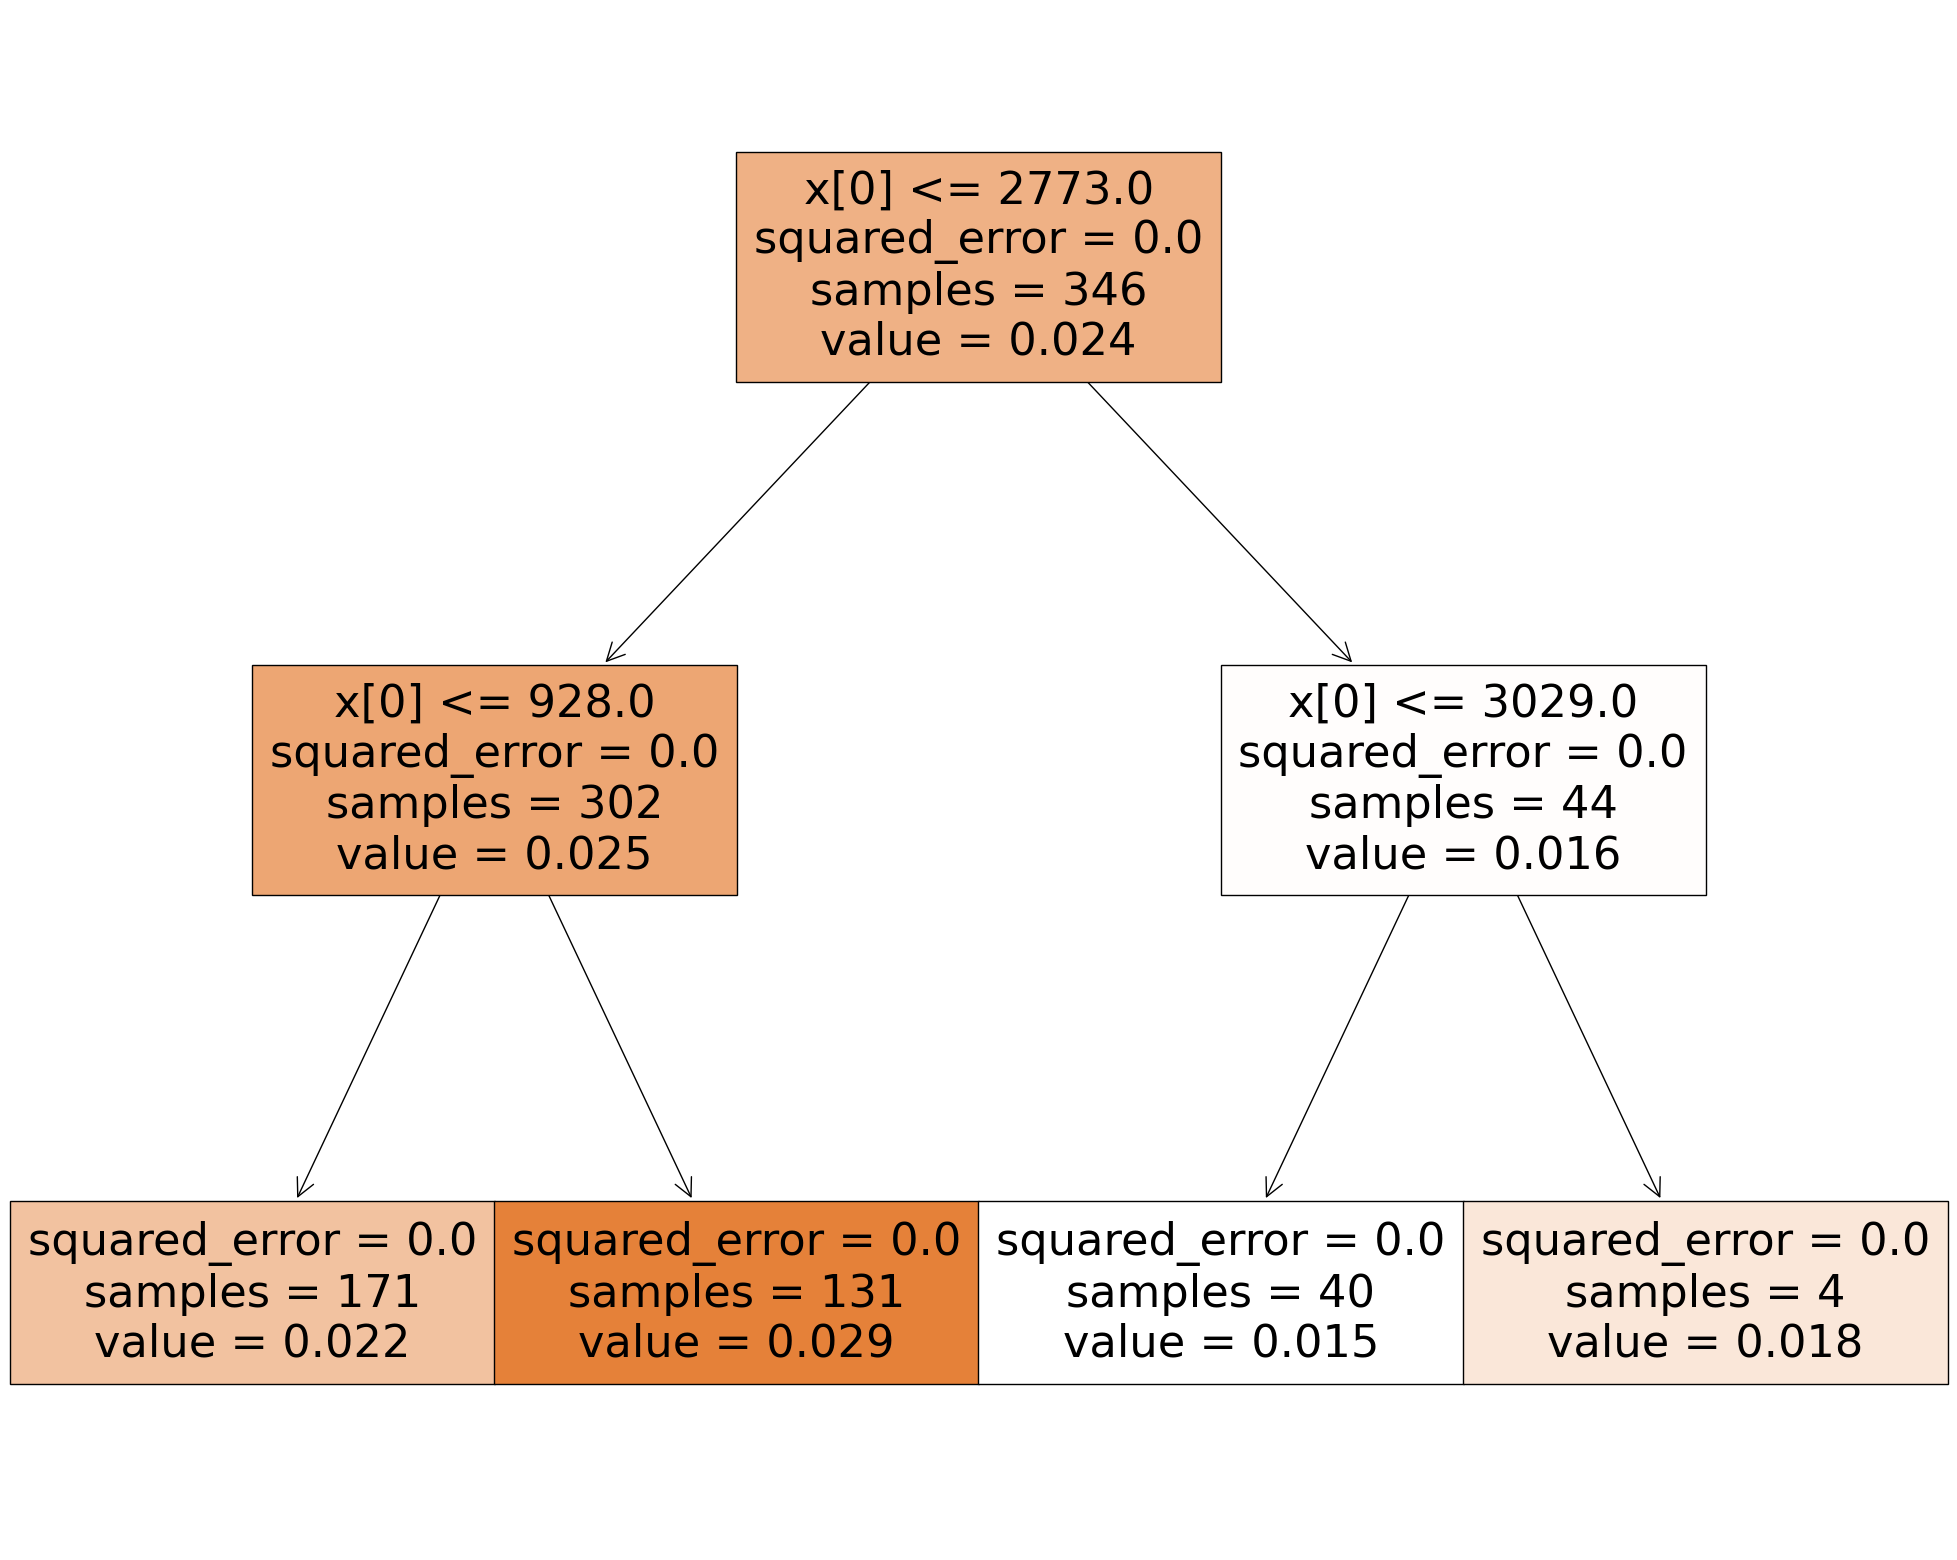

In [48]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg_tree, 
                   filled=True)
plt.plot()